In [1]:
'''
***
SIDENOTE: In this particular excresise we wont be using definitions and import self created classes, 
because for learning purposes we are using other python interpreter, which is quite unfriendly when it comes
to importing self-made classes.
So all code will be manually retyped if needed.
***

Programming team: 
Oktawian Filipkowski, Maciej Zakrzewski
Problem : 
Create decision tree and SVM models and teach them to classify data.
Solution : below :D
We will try to predict if woman will get diabetes.
I our case we start by using diabetes.csv dataset which contains data of indian women endangered with 
diabetes.
Data avalible in datasheet:
-Number of times pregnant.
-Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
-Diastolic blood pressure (mm Hg).
-Triceps skinfold thickness (mm).
-2-Hour serum insulin (mu U/ml).
-Body mass index (weight in kg/(height in m)^2).
-Diabetes pedigree function.
-Age (years).
-Class variable (0 or 1).

First we start by importing necessary libraries, importing the dataset and checking if it loaded properly
'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
'''
Next we create train and test set, split dataset (67 to 33) randomly and check if our model is working,
along with its accuracy on knn model.
'''
x = dataset.iloc[:, [0,1,2,3,4,5,6,7]].values
y = dataset.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size=0.33, random_state=12345
)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7165354330708661


Accuracy:  0.7322834645669292


E:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[139,  32],
       [ 36,  47]], dtype=int64)

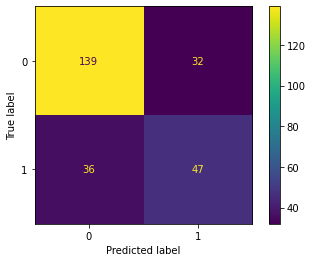

In [3]:
'''
In next step we create decision tree, check predictions and create confusion matrix to check its accuracy
'''
clf = tree.DecisionTreeClassifier()
clf.fit (x_train, y_train)

y_pred = clf.predict(x_test)
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(clf,x_test, y_test)

print("Accuracy: ", ac)
cm

In [4]:
'''
In the next step we check which correlation is most important for our outcome.
When it comes to this dataset its glucose and BMI.
'''
correlation_matrix = dataset.corr()
correlation_matrix["Outcome"]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [5]:
'''
BONUS 1:
We will now create a visualization of decision tree as a text representation..
'''
text_representation = tree.export_text(clf)
print(text_representation)
'''
It will be saved to the file.
'''
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

|--- feature_1 <= 127.50
|   |--- feature_7 <= 28.50
|   |   |--- feature_5 <= 49.10
|   |   |   |--- feature_5 <= 31.40
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  31.40
|   |   |   |   |--- feature_4 <= 9.00
|   |   |   |   |   |--- feature_1 <= 111.50
|   |   |   |   |   |   |--- feature_3 <= 40.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_3 >  40.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  111.50
|   |   |   |   |   |   |--- feature_2 <= 72.00
|   |   |   |   |   |   |   |--- feature_2 <= 55.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_2 >  55.00
|   |   |   |   |   |   |   |   |--- feature_3 <= 33.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_3 >  33.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_2 >  72.00
|   |   |   |   |   |   |   |--- class: 1
|   

Accuracy:  0.8228346456692913


E:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[161,  10],
       [ 35,  48]], dtype=int64)

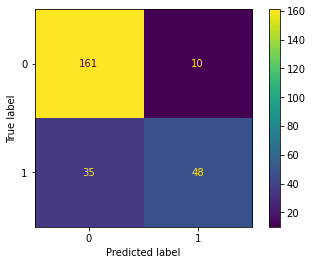

In [6]:
'''
For SVM we start by applying Feature Scalling to improve training performance.
'''
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

'''
Now we train SVM model on training set with linear kernel
'''
clf = SVC(kernel = 'linear', random_state=0)
clf.fit(x_train, y_train)

'''
Predicting a new result and Test set results
'''
y_pred = clf.predict(x_test)
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf,x_test, y_test)

print("Accuracy: ", ac)
cm

In [7]:
'''
As we can see, results above are clearly showing that decision tree is not as accurate as SVM method in 
this particular dataset.
On a side note, KNN is even worse being least accurate one.
'''

'\nAs we can see, results above are clearly showing that decision tree is not as accurate as SVM method in \nthis particular dataset.\nOn a side note, KNN is even worse being least accurate one.\n'

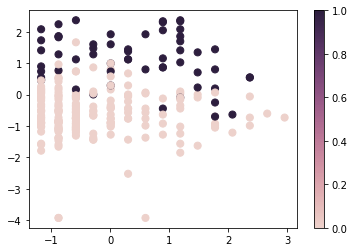

In [8]:

'''
BONUS 1:
We create another visual representation, for bonus 1 exercise.
This time we will do this with another method.
We will create visualizastion with predicted results and compare it to data from diabetes.csv file
'''
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    x_test[:, 0], x_test[:, 1], c=y_pred, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

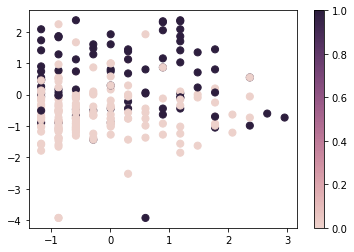

In [9]:
'''
BONUS 1:
We can confirm if this trend is actually true using our data from test set,
it will also serve as comparison to our algorithm data
'''
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    x_test[:, 0], x_test[:, 1], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

Accuracy:  0.7913385826771654


E:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[152,  19],
       [ 34,  49]], dtype=int64)

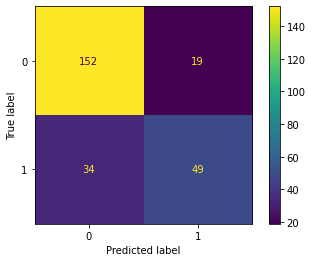

In [10]:
'''
BONUS 2 : 
Kernel SVM
Now we train SVM model on training set with rbf kernel
'''
clf = SVC(kernel = 'rbf', random_state=0)
clf.fit(x_train, y_train)

'''
Predicting a new result and Test set results
'''
y_pred = clf.predict(x_test)
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(clf,x_test, y_test)

print("Accuracy: ", ac)
cm

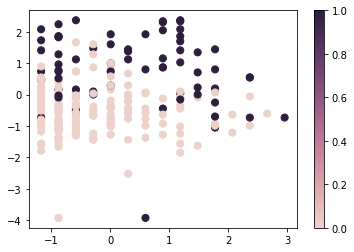

In [11]:
'''
Visualisation for rbf kernel
'''
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    x_test[:, 0], x_test[:, 1], c=y_pred, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

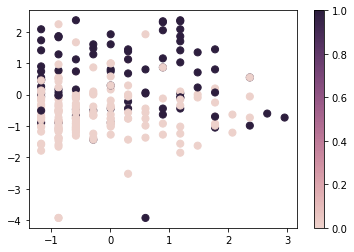

In [12]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    x_test[:, 0], x_test[:, 1], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

In [13]:
'''
For our second dataset we will use suv purchase data:
Link: https://www.kaggle.com/datasets/iamaniket/suv-data
We will try to predict if customer buys a car, using his income and age data
'''
dataset2 = pd.read_csv('suv_data.csv')
dataset2.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [14]:
'''
To make some changes (otherwise 2nd part of exercise would be identical to 1st) we will drop
User ID and Gender columns. User ID is not needed in this particular case and as an 
avid feminist Marcin Zakrzewski believes that Gender is an social construct and as such should be dropped.
'''
dataset2=dataset2 [ [ "Age","EstimatedSalary","Purchased"] ]
print(dataset2)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


In [15]:
'''
Again we create train and test set, split dataset (this time 75 to 25).
'''
X = dataset2.iloc[:, :-1].values
Y = dataset2.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

Accuracy:  0.9


E:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[62,  6],
       [ 4, 28]], dtype=int64)

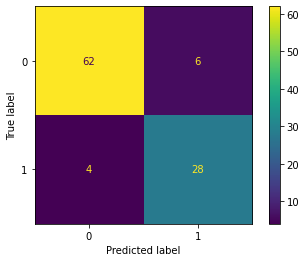

In [16]:
'''
In next step we create decision tree, check predictions and create confusion matrix to check its accuracy
'''
clf2 = tree.DecisionTreeClassifier()
clf2.fit (X_train, Y_train)

Y_pred = clf2.predict(X_test)
ac = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

plot_confusion_matrix(clf2,X_test, Y_test)

print("Accuracy: ", ac)
cm

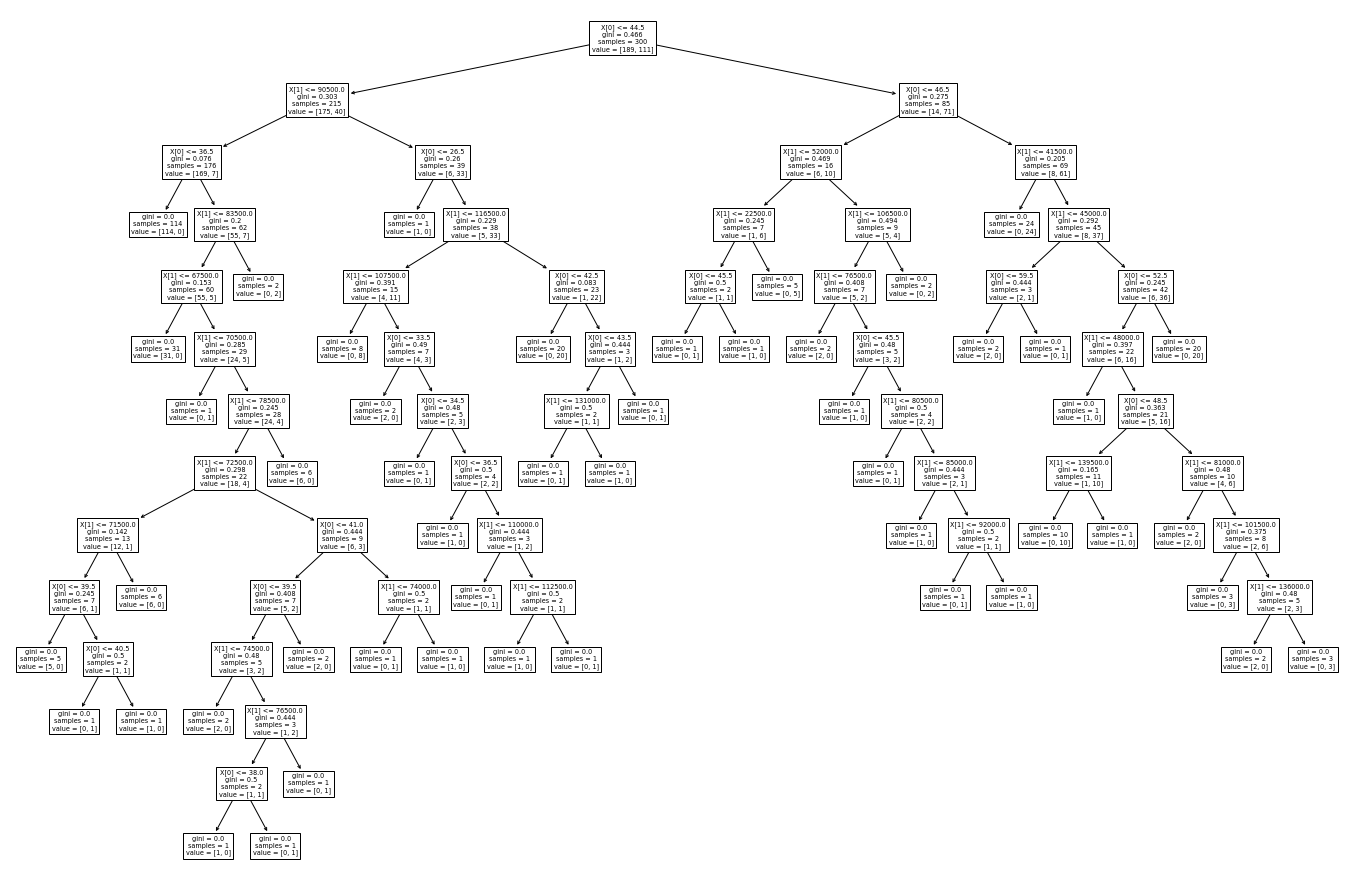

In [17]:
'''
BONUS 1:
We visualize decision tree using alternative method.
'''
from sklearn.tree import plot_tree
plt.figure(figsize=(24,16))
plot_tree(clf2);

In [18]:
'''
Again, for SVM we start by applying Feature Scalling to improve training performance.
'''
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Accuracy:  0.9


E:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[66,  2],
       [ 8, 24]], dtype=int64)

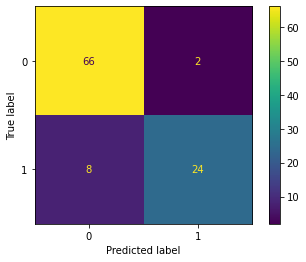

In [19]:
'''
Now we train SVM model on training set with linear kernel
'''
clf2 = SVC(kernel = 'linear', random_state=0)
clf2.fit(X_train, Y_train)

'''
Predicting a new result and Test set results
'''
Y_pred = clf2.predict(X_test)
ac = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

plot_confusion_matrix(clf2,X_test, Y_test)

print("Accuracy: ", ac)
cm

In [20]:
'''
Now we will try to predict the result
'''
print(clf2.predict(sc.transform([[30,87000]])))

[0]


In [21]:
'''
In the next step we predict test set results
'''
Y_pred = clf2.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


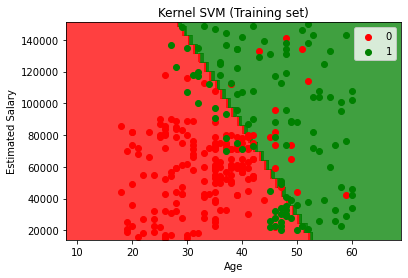

In [22]:
'''
BONUS 1: 
For comparision we will visualize training and test set results, using another 4th method
'''
from matplotlib.colors import ListedColormap
X_set, Y_set = sc.inverse_transform(X_train), Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, clf2.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


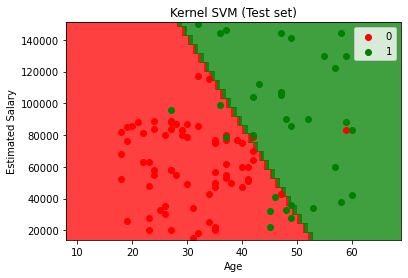

In [23]:
from matplotlib.colors import ListedColormap
X_set, Y_set = sc.inverse_transform(X_test), Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, clf2.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

E:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.9


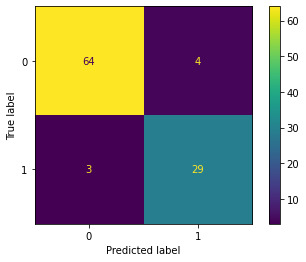

In [24]:
'''
BONUS 2 : 
Kernel SVM
Now we train SVM model on training set with rbf kernel
'''
clf2 = SVC(kernel = 'rbf', random_state=0)
clf2.fit(X_train, Y_train)

'''
Predicting a new result and Test set results
'''
y_pred = clf2.predict(X_test)
ac = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

plot_confusion_matrix(clf2,X_test, Y_test)

print("Accuracy: ", ac)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


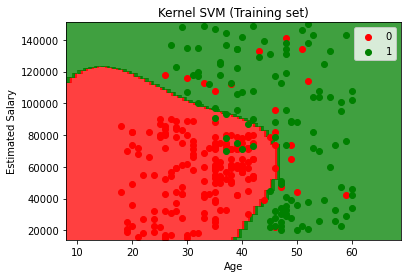

In [25]:
'''
Visualisation for rbf kernel
'''
from matplotlib.colors import ListedColormap
X_set, Y_set = sc.inverse_transform(X_train), Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, clf2.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


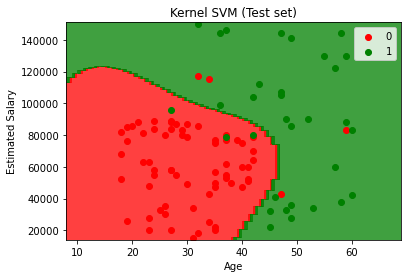

In [26]:
from matplotlib.colors import ListedColormap
X_set, Y_set = sc.inverse_transform(X_test), Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, clf2.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()